<p id="toc"></p>

<br><br>

<h1 style="font-family: Verdana; font-size: 24px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; color: teal; background-color: #ffffff;">TABLE OF CONTENTS</h1>

---

<h3 style="text-indent: 8vw; font-family: Verdana; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#imports">0&nbsp;&nbsp;&nbsp;&nbsp;IMPORTS</a></h3>

---

<h3 style="text-indent: 8vw; font-family: Verdana; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#dataset">1&nbsp;&nbsp;&nbsp;&nbsp;DATASET</a></h3>

---

<h3 style="text-indent: 8vw; font-family: Verdana; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#data_exploration">2&nbsp;&nbsp;&nbsp;&nbsp;DATA EXPLORATION AND VISUALIZATION</a></h3>

<h3 style="text-indent: 15vw; font-family: Verdana; font-size: 15px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#basic_exploration">2.1&nbsp;&nbsp;&nbsp;&nbsp;Basic Exploration</a></h3>

<h3 style="text-indent: 15vw; font-family: Verdana; font-size: 15px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#data_type_check">2.2&nbsp;&nbsp;&nbsp;&nbsp;Data Type Check</a></h3>

<h3 style="text-indent: 15vw; font-family: Verdana; font-size: 15px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#adding_more_information">2.3&nbsp;&nbsp;&nbsp;&nbsp;Adding More Information</a></h3>

<h3 style="text-indent: 15vw; font-family: Verdana; font-size: 15px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#filling_null_values">2.4&nbsp;&nbsp;&nbsp;&nbsp;Filling Null Values</a></h3>

<h3 style="text-indent: 15vw; font-family: Verdana; font-size: 15px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#line_plots">2.5&nbsp;&nbsp;&nbsp;&nbsp;Line Plots</a></h3>

<h3 style="text-indent: 15vw; font-family: Verdana; font-size: 15px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#adding_more_information">2.6&nbsp;&nbsp;&nbsp;&nbsp;Adding More Information</a></h3>

---

<h3 style="text-indent: 8vw; font-family: Verdana; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#helper_functions">3&nbsp;&nbsp;&nbsp;&nbsp;HELPER FUNCTIONS</a></h3>

---

<h3 style="text-indent: 8vw; font-family: Verdana; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#create_dataset">4&nbsp;&nbsp;&nbsp;&nbsp;DATASET EXPLORATION</a></h3>

---

<h3 style="text-indent: 8vw; font-family: Verdana; font-size: 18px; font-style: normal; font-weight: normal; text-decoration: none; text-transform: none; letter-spacing: 2px; color: navy; background-color: #ffffff;"><a href="#modelling">5&nbsp;&nbsp;&nbsp;&nbsp;MODELLING</a></h3>

---

<a id="1"></a>
# <span><center style="font-family: Verdana; font-size: 36px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: teal;" id="imports">0&nbsp;&nbsp;IMPORTS&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></center></span>

In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import os
import pickle


from pandas.tseries.holiday import USFederalHolidayCalendar
from pandas.tseries.offsets import CustomBusinessDay
from sklearn.preprocessing import MinMaxScaler, StandardScaler, LabelEncoder, OneHotEncoder
from sklearn.metrics import mean_absolute_percentage_error, mean_squared_error, mean_absolute_error
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import AdaBoostRegressor, RandomForestRegressor
from sklearn.impute import KNNImputer


from statsmodels.formula.api import ols
from statsmodels.tsa.holtwinters import Holt, SimpleExpSmoothing, ExponentialSmoothing
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller


from colorama import Fore

y_ = Fore.YELLOW
r_ = Fore.RED
g_ = Fore.GREEN
b_ = Fore.BLUE
m_ = Fore.MAGENTA
bl_ = Fore.BLACK

In [58]:
plt.rcParams['figure.figsize'] = (10,8)

In [59]:
class config:
    CSV_PATH = 'dataset/'
    RANDOM_SEED = 15
    train_size = 0.7
    test_size = 0.15
    validation_size = 0.15

<a id="2"></a>
# <span><center style="font-family: Verdana; font-size: 36px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: teal;" id="dataset">1&nbsp;&nbsp;DATASET&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></center></span>

In [60]:
os.listdir(config.CSV_PATH)

['COVID19DistrictWisePositivityAnalysis29April.xlsx',
 'sample_submission.csv',
 'submission_weekly.csv',
 'test.csv',
 'train.csv',
 'WHO-COVID-19-global-data.csv']

In [61]:
train = pd.read_csv(config.CSV_PATH + 'train.csv' )
test = pd.read_csv(config.CSV_PATH + 'test.csv')
covid = pd.read_csv(config.CSV_PATH + 'WHO-COVID-19-global-data.csv')

In [62]:
train.shape, test.shape, covid.shape

((16644, 12), (4900, 10), (200976, 8))

In [63]:
covid.head()

,Date_reported,Country_code,Country,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-03,AF,Afghanistan,EMRO,0,0,0,0
1,2020-01-04,AF,Afghanistan,EMRO,0,0,0,0
2,2020-01-05,AF,Afghanistan,EMRO,0,0,0,0
3,2020-01-06,AF,Afghanistan,EMRO,0,0,0,0
4,2020-01-07,AF,Afghanistan,EMRO,0,0,0,0


In [64]:
covid = covid[covid.Country_code == 'US'][['Date_reported', 'New_cases', 'New_deaths']]
covid.reset_index(inplace= True, drop = True)

- Following Cell calculates that the covid cases are increased on decreased compare to previous_day

In [65]:
covid['case_increment']=covid['New_cases'].diff()

In [66]:
covid_start = covid.Date_reported[0]

In [67]:
covid.head()

,Date_reported,New_cases,New_deaths,case_increment
0,2020-01-03,0,0,NaN
1,2020-01-04,0,0,0.0
2,2020-01-05,0,0,0.0
3,2020-01-06,0,0,0.0
4,2020-01-07,0,0,0.0


* I am considering United States because the co-ordinates belongs to US.

<a id="3"></a>
# <span><center style="font-family: Verdana; font-size: 36px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: teal;" id="data_exploration">2&nbsp;&nbsp;DATA EXPLORATION AND VISUALIZATION&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></center></span>

<a id="2.1"></a>
## <span style="font-family: Verdana; font-size: 30px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: teal;" id="basic_exploration">2.1&nbsp;&nbsp;Basic Exploration&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></center></span>

In [68]:
train.head(16)

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
0,0x2710,2017-01-01,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,Yes,No,5.5,5.5
1,0x33e6,2017-01-01,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,Yes,No,6.1,6.1
2,0x2711,2017-01-02,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,4.8,NaN
3,0x33e7,2017-01-02,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,No,No,6.7,NaN
4,0x2712,2017-01-03,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,5.8,NaN
5,0x33e8,2017-01-03,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,NaN,No,8.1,NaN
6,0x2713,2017-01-04,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,6.6,NaN
7,0x33e9,2017-01-04,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,No,No,7.0,NaN
8,0x2714,2017-01-05,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,4.9,NaN
9,0x33ea,2017-01-05,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,No,NaN,7.4,NaN


In [69]:
train.tail(5)

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count
16639,0x6f53,2021-04-30,WH_0x3f0,37.915825,-89.829262,Type_B,2021,April,No,No,0.2,NaN
16640,0x74c8,2021-04-30,WH_0x3f1,48.692551,-116.319862,Type_A,2021,April,No,No,12.3,NaN
16641,0x74c9,2021-04-30,WH_0x3f1,48.692551,-116.319862,Type_B,2021,April,No,No,3.3,NaN
16642,0x794c,2021-04-30,WH_0x3f2,61.600803,-149.125259,Type_A,2021,April,No,No,7.1,NaN
16643,0x794d,2021-04-30,WH_0x3f2,61.600803,-149.125259,Type_B,2021,April,No,No,3.4,NaN


In [70]:
test.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed
0,0x31fc,2021-05-01,WH_0x3e9,41.681471,NaN,Type_A,2021,May,NaN,No
1,0x31fd,2021-05-01,WH_0x3e9,41.681471,NaN,Type_B,2021,May,Yes,No
2,0x3ed2,2021-05-01,WH_0x3ea,38.749077,-105.183060,Type_A,2021,May,Yes,No
3,0x3ed3,2021-05-01,WH_0x3ea,38.749077,-105.183060,Type_B,2021,May,Yes,No
4,0x4a3a,2021-05-01,WH_0x3eb,35.678970,-109.067413,Type_A,2021,May,Yes,Yes


In [71]:
train.describe()

,Latitude,Longitude,year,daily_dispatch_count,weekly_dispatch_count
count,16312.000000,16228.000000,16644.000000,16644.000000,2372.000000
mean,37.721350,-93.987807,2019.442802,5.042640,35.233938
std,7.403689,17.907439,1.058141,3.304978,20.953378
min,25.750156,-149.125259,2017.000000,0.000000,0.000000
25%,34.361664,-105.183060,2019.000000,2.800000,19.475000
50%,37.915825,-87.551186,2020.000000,4.400000,30.100000
75%,41.681471,-80.279640,2020.000000,7.500000,52.000000
max,61.600803,-72.794746,2021.000000,17.900000,96.400000


In [72]:
test.describe()

,Latitude,Longitude,year
count,4802.000000,4778.000000,4900.0
mean,39.646598,-97.958786,2021.0
std,9.502890,21.543055,0.0
min,25.750156,-149.125259,2021.0
25%,34.361664,-109.067413,2021.0
50%,38.749077,-88.690224,2021.0
75%,41.681471,-82.648254,2021.0
max,61.600803,-72.794746,2021.0


In [73]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16644 entries, 0 to 16643
Data columns (total 12 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   ID                     16644 non-null  object 
 1   date                   16644 non-null  object 
 2   warehouse_ID           16644 non-null  object 
 3   Latitude               16312 non-null  float64
 4   Longitude              16228 non-null  float64
 5   Product_Type           16644 non-null  object 
 6   year                   16644 non-null  int64  
 7   month                  16644 non-null  object 
 8   is_weekend             16145 non-null  object 
 9   is_warehouse_closed    16478 non-null  object 
 10  daily_dispatch_count   16644 non-null  float64
 11  weekly_dispatch_count  2372 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 1.5+ MB


In [74]:
train.isnull().sum()

ID                           0
date                         0
warehouse_ID                 0
Latitude                   332
Longitude                  416
Product_Type                 0
year                         0
month                        0
is_weekend                 499
is_warehouse_closed        166
daily_dispatch_count         0
weekly_dispatch_count    14272
dtype: int64

In [75]:
test.isnull().sum()

ID                       0
date                     0
warehouse_ID             0
Latitude                98
Longitude              122
Product_Type             0
year                     0
month                    0
is_weekend             147
is_warehouse_closed     49
dtype: int64

<a id="2.2"></a>
## <span style="font-family: Verdana; font-size: 30px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: teal;" id="data_type_check">2.2&nbsp;&nbsp;Data Type Check&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></center></span>

In [76]:
print(f'{y_}Let\'s Check the datatypes of columns \n {b_}')
print(train.dtypes)

Let's Check the datatypes of columns 
 
ID                        object
date                      object
warehouse_ID              object
Latitude                 float64
Longitude                float64
Product_Type              object
year                       int64
month                     object
is_weekend                object
is_warehouse_closed       object
daily_dispatch_count     float64
weekly_dispatch_count    float64
dtype: object


In [77]:
print(f'{y_}Let\'s Check the datatypes of columns \n {b_}')
print(covid.dtypes)

Let's Check the datatypes of columns 
 
Date_reported      object
New_cases           int64
New_deaths          int64
case_increment    float64
dtype: object


In [78]:
print(f'{y_}Let\'s Check the datatypes of columns \n {b_}')
print(test.dtypes)

Let's Check the datatypes of columns 
 
ID                      object
date                    object
warehouse_ID            object
Latitude               float64
Longitude              float64
Product_Type            object
year                     int64
month                   object
is_weekend              object
is_warehouse_closed     object
dtype: object


> So we have on error regarding date column, it should be datetime type but it is object type.
>
> So we need to change it

In [79]:
covid = covid.rename({'Date_reported':'date'}, axis= 1)

In [80]:
train['date'] = pd.to_datetime(train['date'])
covid['date'] = pd.to_datetime(covid['date'])
test['date'] = pd.to_datetime(test['date'])

In [81]:
print(f'{y_}Let\'s Check the datatypes of columns \n {b_}')
print(train.dtypes)

Let's Check the datatypes of columns 
 
ID                               object
date                     datetime64[ns]
warehouse_ID                     object
Latitude                        float64
Longitude                       float64
Product_Type                     object
year                              int64
month                            object
is_weekend                       object
is_warehouse_closed              object
daily_dispatch_count            float64
weekly_dispatch_count           float64
dtype: object


In [82]:
print(f'{y_}Let\'s Check the datatypes of columns \n {b_}')
print(covid.dtypes)

Let's Check the datatypes of columns 
 
date              datetime64[ns]
New_cases                  int64
New_deaths                 int64
case_increment           float64
dtype: object


Now the dataset is perfect for adding more information, So let's Add more columns.

<a id="2.3"></a>
## <span style="font-family: Verdana; font-size: 30px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: teal;" id="adding_more_information">2.3&nbsp;&nbsp;Adding More Information&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></center></span>

In [83]:
def more_information_fun(data_frame, date_col_name = 'date'):
    df = data_frame.copy()
    df['day_name'] = df[date_col_name].dt.day_name()
    df['day_of_week'] = df[date_col_name].dt.dayofweek
    df['month_num'] = df[date_col_name].dt.month
    start_date = df[date_col_name][0]
    end_date = df[date_col_name].iloc[-1]
    ushd = CustomBusinessDay(calendar = USFederalHolidayCalendar())
    holidays_df = pd.DataFrame(pd.date_range(start=start_date, end = end_date, freq=ushd), columns=['date'])
    holidays_df['holiday'] = 'No'
    train_with_holiday = pd.merge(left = df, right= holidays_df, on = 'date', how = 'left')
    df = pd.merge(left = train_with_holiday, right= covid, on = 'date', how = 'left')
    return df


In [84]:
train_complete = more_information_fun(train)

In [85]:
test_complete = more_information_fun(test)

In [86]:
test_complete.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,day_name,day_of_week,month_num,holiday,New_cases,New_deaths,case_increment
0,0x31fc,2021-05-01,WH_0x3e9,41.681471,NaN,Type_A,2021,May,NaN,No,Saturday,5,5,NaN,55768,758,1220.0
1,0x31fd,2021-05-01,WH_0x3e9,41.681471,NaN,Type_B,2021,May,Yes,No,Saturday,5,5,NaN,55768,758,1220.0
2,0x3ed2,2021-05-01,WH_0x3ea,38.749077,-105.183060,Type_A,2021,May,Yes,No,Saturday,5,5,NaN,55768,758,1220.0
3,0x3ed3,2021-05-01,WH_0x3ea,38.749077,-105.183060,Type_B,2021,May,Yes,No,Saturday,5,5,NaN,55768,758,1220.0
4,0x4a3a,2021-05-01,WH_0x3eb,35.678970,-109.067413,Type_A,2021,May,Yes,Yes,Saturday,5,5,NaN,55768,758,1220.0


In [87]:
train_complete.head()

,ID,date,warehouse_ID,Latitude,Longitude,Product_Type,year,month,is_weekend,is_warehouse_closed,daily_dispatch_count,weekly_dispatch_count,day_name,day_of_week,month_num,holiday,New_cases,New_deaths,case_increment
0,0x2710,2017-01-01,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,Yes,No,5.5,5.5,Sunday,6,1,NaN,NaN,NaN,NaN
1,0x33e6,2017-01-01,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,Yes,No,6.1,6.1,Sunday,6,1,NaN,NaN,NaN,NaN
2,0x2711,2017-01-02,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,4.8,NaN,Monday,0,1,NaN,NaN,NaN,NaN
3,0x33e7,2017-01-02,WH_0x3ea,38.749077,-105.183060,Type_A,2017,January,No,No,6.7,NaN,Monday,0,1,NaN,NaN,NaN,NaN
4,0x2712,2017-01-03,WH_0x3e9,41.681471,-72.794746,Type_A,2017,January,No,No,5.8,NaN,Tuesday,1,1,No,NaN,NaN,NaN


<a id="2.4"></a>
## <span style="font-family: Verdana; font-size: 30px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: teal;" id="filling_null_values">2.4&nbsp;&nbsp;Filling Null Values&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></center></span>

<div class="alert alert-block alert-danger" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">🛑 &nbsp; NOTE:</b><br><br>- As We know there are many null values in the dataset and many of them have valid and strong reason. Those missing values can easly be filled.<br>
    - Let's Fill them out 😃😃
</div>

Text(0.5, 1.0, 'Testing Dataset')

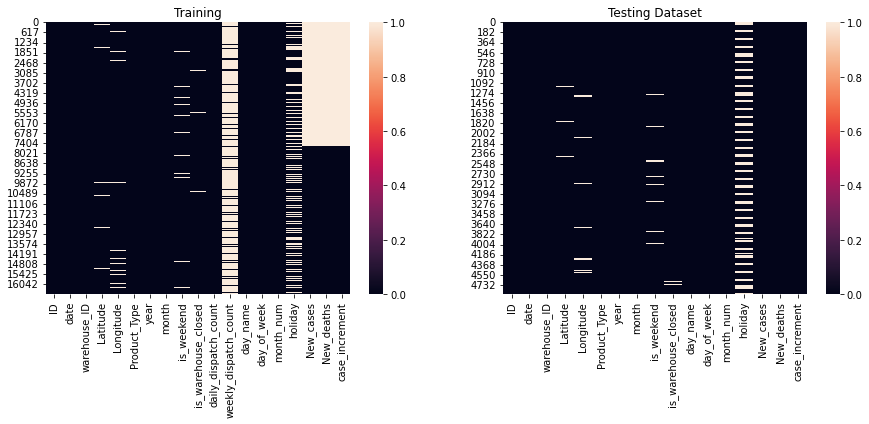

In [88]:
plt.figure(figsize = (15,5))
plt.subplot(1,2,1)
sns.heatmap(train_complete.isnull())
plt.title('Training')

plt.subplot(1,2,2)
sns.heatmap(test_complete.isnull())
plt.title('Testing Dataset')

<div class="alert alert-block alert-danger" style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">✅ &nbsp; Observations:</b><br><br>- There are many Missing values in Covid column because in that period there was zero covid patients (dataset is from 2018 and covid first patient was found in 2020)<br>
    - The missing values in Holiday column, corresponds to Holidays in US, so we have to replace them with 'Yes'<br>
    - The Missing values in Weekly dispatch Will be replace by Zero. <br>
    - Missing values of columns Latitude and Longitude will be replaced with the help of warehouse_id.
    - Missing values in is_weekend is easy to replace based on saturday and sunday
</div>

In [89]:
train_complete['holiday'].fillna('Yes', inplace = True)
train_complete['weekly_dispatch_count'].fillna(0, inplace = True)
train_complete['New_cases'].fillna(0, inplace = True)
train_complete['New_deaths'].fillna(0, inplace= True)
train_complete['case_increment'].fillna(0, inplace = True)

In [90]:
train_complete.loc[(train_complete['day_of_week'] == 6) | (train_complete['day_of_week'] == 5), 'is_weekend'] = 'Yes'
train_complete.loc[(train_complete['day_of_week'] != 6) & (train_complete['day_of_week'] != 5), 'is_weekend'] = 'No'

In [91]:
test_complete['holiday'].fillna('Yes', inplace = True)
test_complete.loc[(test_complete['day_of_week'] == 6) | (test_complete['day_of_week'] == 5), 'is_weekend'] = 'Yes'
test_complete.loc[(test_complete['day_of_week'] != 6) & (test_complete['day_of_week'] != 5), 'is_weekend'] = 'No'

In [92]:
T = train_complete.groupby('warehouse_ID').first()

In [93]:
for warehouse in T.index:
    train_complete.loc[train_complete['warehouse_ID'] == warehouse, ['Latitude', 'Longitude']] = T.loc[warehouse, ['Latitude', 'Longitude']].to_numpy()

In [94]:
for id in train_complete.warehouse_ID.unique():
    print(f'{bl_}for {id} The values are: {b_}', train_complete.groupby('warehouse_ID').get_group(id)[['Latitude', 'Longitude']].value_counts().shape, 'Latitude and Longitude')

for WH_0x3e9 The values are:  (1,) Latitude and Longitude
for WH_0x3ea The values are:  (1,) Latitude and Longitude
for WH_0x3eb The values are:  (1,) Latitude and Longitude
for WH_0x3ec The values are:  (1,) Latitude and Longitude
for WH_0x3ed The values are:  (1,) Latitude and Longitude
for WH_0x3ee The values are:  (1,) Latitude and Longitude
for WH_0x3ef The values are:  (1,) Latitude and Longitude
for WH_0x3f1 The values are:  (1,) Latitude and Longitude
for WH_0x3f0 The values are:  (1,) Latitude and Longitude
for WH_0x3f2 The values are:  (1,) Latitude and Longitude


In [95]:
T = test_complete.groupby('warehouse_ID').first()

In [96]:
for warehouse in T.index:
    test_complete.loc[test_complete['warehouse_ID'] == warehouse, ['Latitude', 'Longitude']] = T.loc[warehouse, ['Latitude', 'Longitude']].to_numpy()

In [97]:
for id in test_complete.warehouse_ID.unique():
    print(f'{bl_}for {id} The values are: {b_}', test_complete.groupby('warehouse_ID').get_group(id)[['Latitude', 'Longitude']].value_counts().shape, 'Latitude and Longitude')

for WH_0x3e9 The values are:  (1,) Latitude and Longitude
for WH_0x3ea The values are:  (1,) Latitude and Longitude
for WH_0x3eb The values are:  (1,) Latitude and Longitude
for WH_0x3ec The values are:  (1,) Latitude and Longitude
for WH_0x3ed The values are:  (1,) Latitude and Longitude
for WH_0x3ee The values are:  (1,) Latitude and Longitude
for WH_0x3ef The values are:  (1,) Latitude and Longitude
for WH_0x3f0 The values are:  (1,) Latitude and Longitude
for WH_0x3f1 The values are:  (1,) Latitude and Longitude
for WH_0x3f2 The values are:  (1,) Latitude and Longitude


In [98]:
train_complete.isnull().sum()

ID                         0
date                       0
warehouse_ID               0
Latitude                   0
Longitude                  0
Product_Type               0
year                       0
month                      0
is_weekend                 0
is_warehouse_closed      166
daily_dispatch_count       0
weekly_dispatch_count      0
day_name                   0
day_of_week                0
month_num                  0
holiday                    0
New_cases                  0
New_deaths                 0
case_increment             0
dtype: int64

In [99]:
test_complete.isnull().sum()

ID                      0
date                    0
warehouse_ID            0
Latitude                0
Longitude               0
Product_Type            0
year                    0
month                   0
is_weekend              0
is_warehouse_closed    49
day_name                0
day_of_week             0
month_num               0
holiday                 0
New_cases               0
New_deaths              0
case_increment          0
dtype: int64

In [100]:
train_complete.is_weekend.value_counts()

No     11904
Yes     4740
Name: is_weekend, dtype: int64

In [101]:
train_complete[train_complete.date < covid_start]['is_warehouse_closed'].value_counts()

No    7493
Name: is_warehouse_closed, dtype: int64

In [102]:
covid_start

'2020-01-03'

<div style="margin: 2em; line-height: 1.7em; font-family: Verdana;">
    <b style="font-size: 16px;">✅ &nbsp; Observation:</b><br><br>- Now This is more interesting, Before covid the warehouse is almost never closed.<br>
    - So, We can fill all null values before covid with 'No'.
</div>

### Filling Null using manual method

In [ ]:
train_complete.loc[(train_complete.date < covid_start) & (train_complete.is_warehouse_closed.isnull()), 'is_warehouse_closed'] = 'No'

In [47]:
train_complete.isnull().sum()

ID                         0
date                       0
warehouse_ID               0
Latitude                   0
Longitude                  0
Product_Type               0
year                       0
month                      0
is_weekend                 0
is_warehouse_closed      166
daily_dispatch_count       0
weekly_dispatch_count      0
day_name                   0
day_of_week                0
month_num                  0
holiday                    0
New_cases                  0
New_deaths                 0
case_increment             0
dtype: int64

In [ ]:
train_complete[train_complete.is_warehouse_closed=='Yes'].head()

In [ ]:
train_complete[(train_complete.daily_dispatch_count != 0) & (train_complete.is_warehouse_closed.isnull())]

In [ ]:
train_complete

In [ ]:
train_complete.loc[train_complete.daily_dispatch_count > 0, 'is_warehouse_closed'] = 'No'
train_complete.loc[train_complete.daily_dispatch_count == 0, 'is_warehouse_closed'] = 'Yes'

In [ ]:
train_complete.isnull().sum()

In [ ]:
train_complete[(train_complete.is_weekend=='Yes') & (train_complete.date > '2020-03-21')]

### Filling null values using KNNImputation

In [103]:
columns_obj=train_complete.columns[train_complete.dtypes == 'object']

In [104]:
train_complete[columns_obj]

,ID,warehouse_ID,Product_Type,month,is_weekend,is_warehouse_closed,day_name,holiday
0,0x2710,WH_0x3e9,Type_A,January,Yes,No,Sunday,Yes
1,0x33e6,WH_0x3ea,Type_A,January,Yes,No,Sunday,Yes
2,0x2711,WH_0x3e9,Type_A,January,No,No,Monday,Yes
3,0x33e7,WH_0x3ea,Type_A,January,No,No,Monday,Yes
4,0x2712,WH_0x3e9,Type_A,January,No,No,Tuesday,No
...,...,...,...,...,...,...,...,...
16639,0x6f53,WH_0x3f0,Type_B,April,No,No,Friday,No
16640,0x74c8,WH_0x3f1,Type_A,April,No,No,Friday,No
16641,0x74c9,WH_0x3f1,Type_B,April,No,No,Friday,No
16642,0x794c,WH_0x3f2,Type_A,April,No,No,Friday,No


In [105]:
def encoder_fun(dataframe_input, columns = None, dict_obj = None,):
    dataframe = dataframe_input.copy()
    full_encoding_dict = {}
    if columns is None:
        columns = dataframe.columns[dataframe.dtypes == 'object']
    for i in range(len(columns)):
        uniques_obs = dataframe[columns[i]].unique().tolist()
        try:
            uniques_obs.sort()
        except:
            pass
        encoding_dict = dict(zip(uniques_obs, range(len(uniques_obs))))
        dataframe[columns[i]] = dataframe[columns[i]].map(encoding_dict)
        print(columns[i])
        full_encoding_dict[columns[i]] = encoding_dict
    return full_encoding_dict, dataframe

In [106]:
encoding_dict, train_complete_encoded = encoder_fun(train_complete,
     columns=['warehouse_ID', 'Product_Type', 'is_weekend', 'holiday'])

warehouse_ID
Product_Type
is_weekend
holiday


In [107]:
encoding_dict

{'warehouse_ID': {'WH_0x3e9': 0,
  'WH_0x3ea': 1,
  'WH_0x3eb': 2,
  'WH_0x3ec': 3,
  'WH_0x3ed': 4,
  'WH_0x3ee': 5,
  'WH_0x3ef': 6,
  'WH_0x3f0': 7,
  'WH_0x3f1': 8,
  'WH_0x3f2': 9},
 'Product_Type': {'Type_A': 0, 'Type_B': 1},
 'is_weekend': {'No': 0, 'Yes': 1},
 'holiday': {'No': 0, 'Yes': 1}}

In [53]:
# label_encoder = LabelEncoder()
# train_complete_encoded['is_warehouse_closed']=label_encoder.fit_transform(train_complete_encoded['is_warehouse_closed'], )

In [109]:
train_complete_encoded.isnull().sum()

ID                         0
date                       0
warehouse_ID               0
Latitude                   0
Longitude                  0
Product_Type               0
year                       0
month                      0
is_weekend                 0
is_warehouse_closed      166
daily_dispatch_count       0
weekly_dispatch_count      0
day_name                   0
day_of_week                0
month_num                  0
holiday                    0
New_cases                  0
New_deaths                 0
case_increment             0
dtype: int64

In [108]:
train_complete_encoded['is_warehouse_closed'].unique()

array(['No', nan, 'Yes'], dtype=object)

In [114]:
is_warehouse_dict = {'Yes':1, 'No':0}
train_complete_encoded['is_warehouse_closed']=train_complete_encoded['is_warehouse_closed'].map(is_warehouse_dict)

In [117]:
train_complete_encoded['is_warehouse_closed'].unique()

array([ 0., nan,  1.])

In [ ]:
train_complete_encoded.head()

In [128]:
train_complete_imputer = train_complete_encoded.copy()
U = ['warehouse_ID', 'Latitude', 
    'Longitude', 'Product_Type', 'year', 'is_weekend', 'is_warehouse_closed',
    'day_of_week', 'month_num', 'holiday', 'New_cases', 'New_deaths', 'case_increment']
knn_inputer = KNNImputer()
train_complete_imputer[U] = knn_inputer.fit_transform(train_complete_imputer[U])

In [129]:
train_complete_imputer.isnull().sum()

ID                       0
date                     0
warehouse_ID             0
Latitude                 0
Longitude                0
Product_Type             0
year                     0
month                    0
is_weekend               0
is_warehouse_closed      0
daily_dispatch_count     0
weekly_dispatch_count    0
day_name                 0
day_of_week              0
month_num                0
holiday                  0
New_cases                0
New_deaths               0
case_increment           0
dtype: int64

In [ ]:
train_complete_encoded.columns

<a id="2.5"></a>
## <span style="font-family: Verdana; font-size: 30px; font-style: normal; font-weight: bold; text-decoration: none; text-transform: none; letter-spacing: 3px; background-color: #ffffff; color: teal;" id="line_plots">2.5&nbsp;&nbsp;Line Plots&nbsp;&nbsp;&nbsp;&nbsp;<a href="#toc">&#10514;</a></center></span>

In [ ]:
px.line(data_frame= train, y = 'weekly_dispatch_count', x = 'date')

In [ ]:
train.columns

In [ ]:
px.line(data_frame= train, y = 'daily_dispatch_count', x = 'date', 
    hover_data= ['warehouse_ID', 'is_weekend'], color = 'warehouse_ID' )